In [26]:
print("Data Rumah Sakit:")
display(hospital.head())

print("Data Pasien:")
display(healthcare.head())

Data Rumah Sakit:


,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328
1,1106014,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45
2,1171110,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487
3,1171163,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,Jl. Prof A. Madjid Ibrahim I No. 5 Banda Aceh ...,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0
4,1102027,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) K...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537


Data Pasien:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal


C:\Users\Salsabila\AppData\Local\Temp\ipykernel_24784\417984448.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




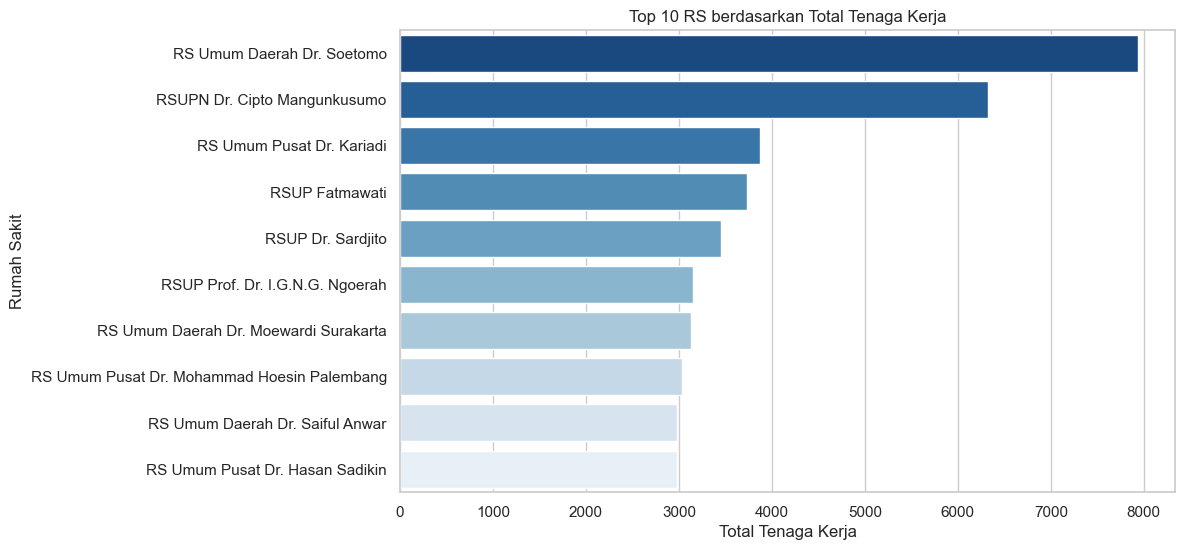

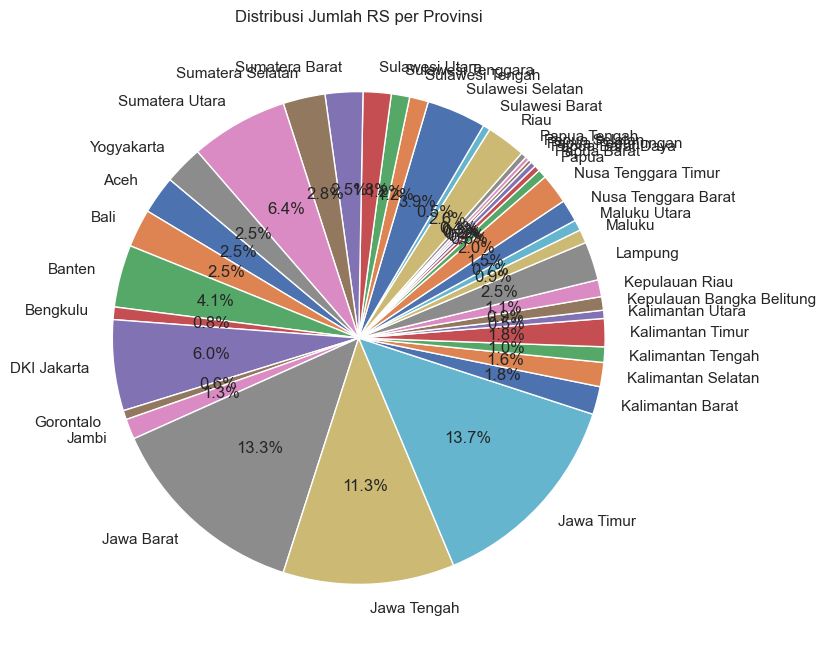

C:\Users\Salsabila\AppData\Local\Temp\ipykernel_24784\417984448.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




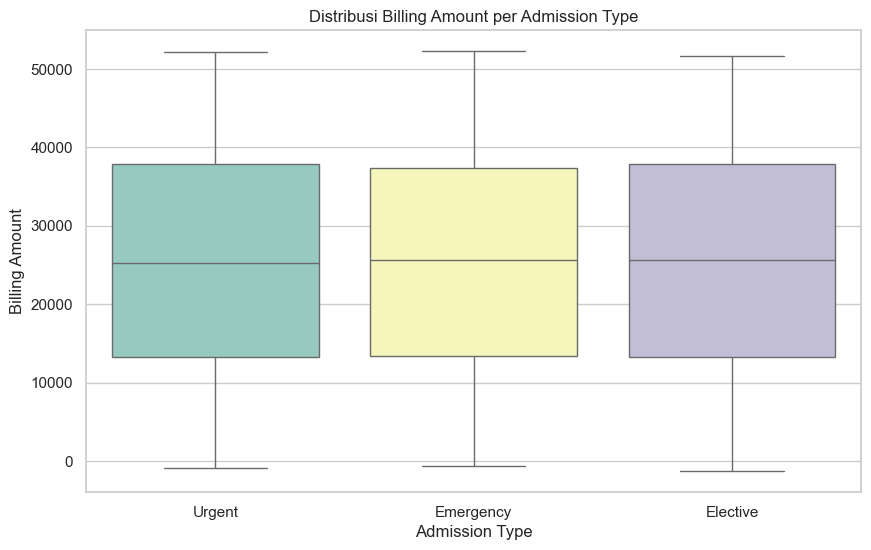

C:\Users\Salsabila\AppData\Local\Temp\ipykernel_24784\417984448.py:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




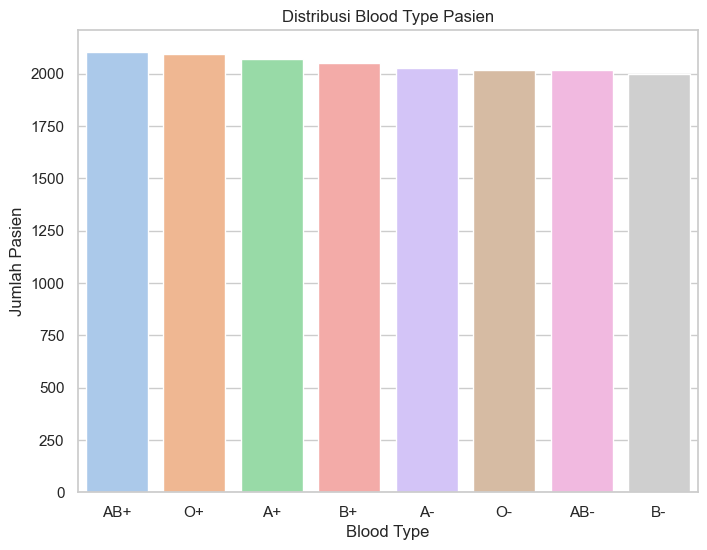

In [36]:
# ============================
# Dashboard Final: RS & Pasien
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

# ============================
# Load Data
# ============================
hospital = pd.read_excel("hospital_Indonesia_datasets_.xls")
healthcare = pd.read_excel("healthcare_dataset.xls")

# ============================
# Chart 1: Horizontal Bar Chart Top 10 RS by Total Tenaga Kerja (RS)
# ============================
top10_tenaga = hospital.sort_values('total_tenaga_kerja', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='total_tenaga_kerja', y='nama', data=top10_tenaga, palette='Blues_r')
plt.xlabel('Total Tenaga Kerja')
plt.ylabel('Rumah Sakit')
plt.title('Top 10 RS berdasarkan Total Tenaga Kerja')
plt.show()

# ============================
# Chart 2: Pie Chart Distribusi RS per Provinsi (RS)
# ============================
rs_provinsi = hospital.groupby('propinsi').size().reset_index(name='Jumlah_RS')
plt.figure(figsize=(8,8))
plt.pie(rs_provinsi['Jumlah_RS'], labels=rs_provinsi['propinsi'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jumlah RS per Provinsi')
plt.show()

# ============================
# Chart 4: Boxplot Billing Amount per Admission Type (Pasien)
# ============================
plt.figure(figsize=(10,6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=healthcare, palette='Set3')
plt.title('Distribusi Billing Amount per Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

# ============================
# Chart 5: Countplot Blood Type pasien (Pasien)
# ============================
plt.figure(figsize=(8,6))
sns.countplot(x='Blood Type', data=healthcare, palette='pastel',
              order=healthcare['Blood Type'].value_counts().index)
plt.title('Distribusi Blood Type Pasien')
plt.xlabel('Blood Type')
plt.ylabel('Jumlah Pasien')
plt.show()


In [35]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ============================
# Load Data
# ============================
hospital = pd.read_excel("hospital_Indonesia_datasets_.xls")
healthcare = pd.read_excel("healthcare_dataset.xls")

# ============================
# Persiapan Data
# ============================

# Chart 1: Top 10 RS Tenaga Kerja
top10_tenaga = hospital.sort_values('total_tenaga_kerja', ascending=False).head(10)

# Chart 2: Pie Chart RS per Provinsi (top 10)
rs_provinsi = hospital.groupby('propinsi').size().reset_index(name='Jumlah_RS')
top10_provinsi_pie = rs_provinsi.sort_values('Jumlah_RS', ascending=False).head(10)

# Chart 3: Boxplot Billing Amount per Admission Type
# Chart 4: Countplot Blood Type pasien
blood_count = healthcare['Blood Type'].value_counts().reset_index()
blood_count.columns = ['Blood Type','Jumlah']

# ============================
# Buat Subplots: 2 row, 2 col dengan Pie chart type 'domain'
# ============================
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type":"xy"}, {"type":"domain"}],
           [{"type":"xy"}, {"type":"xy"}]],
    subplot_titles=(
        "Top 10 RS Tenaga Kerja",
        "Distribusi RS per Provinsi (Top 10)",
        "Billing Amount per Admission Type",
        "Distribusi Blood Type Pasien"
    ),
    horizontal_spacing=0.15, vertical_spacing=0.2
)

# ============================
# Chart 1: Horizontal Bar Top 10 RS Tenaga Kerja
# ============================
fig.add_trace(
    go.Bar(
        x=top10_tenaga['total_tenaga_kerja'], 
        y=top10_tenaga['nama'],
        orientation='h',
        marker_color='blue',
        name='Tenaga Kerja'
    ),
    row=1, col=1
)

# ============================
# Chart 2: Pie Chart Top 10 Provinsi RS
# ============================
fig.add_trace(
    go.Pie(
        labels=top10_provinsi_pie['propinsi'],
        values=top10_provinsi_pie['Jumlah_RS'],
        name='RS per Provinsi'
    ),
    row=1, col=2
)

# ============================
# Chart 3: Boxplot Billing Amount per Admission Type
# ============================
fig.add_trace(
    go.Box(
        y=healthcare['Billing Amount'],
        x=healthcare['Admission Type'],
        name='Billing Amount',
        marker_color='orange'
    ),
    row=2, col=1
)

# ============================
# Chart 4: Countplot Blood Type pasien
# ============================
fig.add_trace(
    go.Bar(
        x=blood_count['Blood Type'],
        y=blood_count['Jumlah'],
        marker_color='green',
        name='Blood Type'
    ),
    row=2, col=2
)

# ============================
# Layout
# ============================
fig.update_layout(
    height=900, width=1100,
    title_text="Dashboard Rumah Sakit & Pasien Indonesia (Rapi, Tanpa Peta)",
    showlegend=False,
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()


In [130]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# ============================
# Load Data
# ============================
hospital = pd.read_excel("Hospital_Indonesia_datasets.xls")
healthcare = pd.read_excel("healthcare_dataset.xls")

# ============================
# Persiapan Data
# ============================
total_rs = hospital.shape[0]
total_tenaga = hospital['total_tenaga_kerja'].sum()
total_pasien = healthcare.shape[0]
total_blood_types = healthcare['Blood Type'].nunique()

# Top 10 RS Tenaga Kerja
top10_tenaga = hospital.sort_values('total_tenaga_kerja', ascending=False).head(10)

# Pie Chart RS per Provinsi (top 10)
rs_provinsi = hospital.groupby('propinsi').size().reset_index(name='Jumlah_RS')
top10_provinsi_pie = rs_provinsi.sort_values('Jumlah_RS', ascending=False).head(10)

# Count Blood Type pasien
blood_count = healthcare['Blood Type'].value_counts().reset_index()
blood_count.columns = ['Blood Type','Jumlah']

# ============================
# Buat Subplots 2x2
# ============================
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type":"xy"}, {"type":"domain"}],
           [{"type":"xy"}, {"type":"xy"}]],
    subplot_titles=(
        "Top 10 RS Tenaga Kerja",
        "Distribusi RS per Provinsi (Top 10)",
        "Billing Amount per Admission Type",
        "Distribusi Blood Type Pasien"
    ),
    horizontal_spacing=0.15, vertical_spacing=0.25
)

# ============================
# Chart 1: Horizontal Bar Top 10 RS Tenaga Kerja
# ============================
fig.add_trace(
    go.Bar(
        x=top10_tenaga['total_tenaga_kerja'], 
        y=top10_tenaga['nama'],
        orientation='h',
        marker=dict(color=top10_tenaga['total_tenaga_kerja'], colorscale='Blues'),
        hovertemplate='%{y}: %{x} tenaga kerja<extra></extra>'
    ),
    row=1, col=1
)

# ============================
# Chart 2: Pie Chart Top 10 Provinsi RS
# ============================
fig.add_trace(
    go.Pie(
        labels=top10_provinsi_pie['propinsi'],
        values=top10_provinsi_pie['Jumlah_RS'],
        hole=0.3,
        marker=dict(colors=px.colors.qualitative.Set3),
        hoverinfo='label+value+percent'
    ),
    row=1, col=2
)

# ============================
# Chart 3: Boxplot Billing Amount per Admission Type
# ============================
fig.add_trace(
    go.Box(
        y=healthcare['Billing Amount'],
        x=healthcare['Admission Type'],
        marker_color='orange',
        notched=True,
        boxmean='sd',
        hovertemplate='Admission: %{x}<br>Billing: %{y}<extra></extra>'
    ),
    row=2, col=1
)

# ============================
# Chart 4: Countplot Blood Type pasien
# ============================
fig.add_trace(
    go.Bar(
        x=blood_count['Blood Type'],
        y=blood_count['Jumlah'],
        marker_color='mediumseagreen',
        hovertemplate='Blood Type %{x}: %{y} pasien<extra></extra>'
    ),
    row=2, col=2
)

# ============================
# Card Indikator di atas chart
# ============================
annotations = [
    dict(text=f"🏥 Total RS<br><b>{total_rs}</b>", x=0.1, y=1.05,
         xref="paper", yref="paper", showarrow=False,
         font=dict(size=14, color="white"), align="center",
         bgcolor="royalblue", opacity=0.9, borderpad=8, bordercolor='white', borderwidth=1),
    dict(text=f"👩‍⚕️ Total Tenaga Kerja<br><b>{total_tenaga}</b>", x=0.3, y=1.05,
         xref="paper", yref="paper", showarrow=False,
         font=dict(size=14, color="white"), align="center",
         bgcolor="green", opacity=0.5, borderpad=8, bordercolor='white', borderwidth=1),
    dict(text=f"🧑‍🤝‍🧑 Total Pasien<br><b>{total_pasien}</b>", x=0.5, y=1.05,
         xref="paper", yref="paper", showarrow=False,
         font=dict(size=14, color="white"), align="center",
         bgcolor="orange", opacity=0.5, borderpad=8, bordercolor='white', borderwidth=1),
    dict(text=f"🩸 Jenis Blood Type<br><b>{total_blood_types}</b>", x=0.7, y=1.05,
         xref="paper", yref="paper", showarrow=False,
         font=dict(size=14, color="white"), align="center",
         bgcolor="red", opacity=0.9, borderpad=8, bordercolor='white', borderwidth=1),
]

fig.update_layout(annotations=annotations)

# ============================
# Layout Dashboard
# ============================
fig.update_layout(
    height=950, width=1200,
    showlegend=True,
    margin=dict(t=180, b=50, l=50, r=50),
    paper_bgcolor='whitesmoke'
)

# ============================
# Tampilkan dashboard
# ============================
fig.show()


In [131]:
# SIMPAN KE HTML (INI WAJIB)
fig.write_html(
    "charts.html",
    include_plotlyjs="cdn",
    full_html=True
)


In [186]:
fig.update_layout(
    width=3500,     
    height=2500,     
)


In [187]:
fig.write_html(
    "charts.html",
    include_plotlyjs="cdn",
    full_html=True
)


In [184]:


# Judul tiap chart
fig.for_each_annotation(
    lambda a: a.update(font=dict(size=22))
)

fig.update_xaxes(
    tickfont=dict(size=22),     # 🔥 ukuran angka & label X
    title_font=dict(size=22)    # 🔥 judul sumbu X
)

fig.update_yaxes(
    tickfont=dict(size=22),     # 🔥 ukuran angka & label Y
    title_font=dict(size=22)    # 🔥 judul sumbu Y
)





In [181]:
fig.data[1].update(
    textinfo='label+percent',     # tampilkan nama + %
    textfont=dict(size=22),       # 🔥 BESAR
    insidetextorientation='auto'
)


Pie({
    'domain': {'x': [0.575, 1.0], 'y': [0.625, 1.0]},
    'hole': 0.3,
    'hoverinfo': 'label+value+percent',
    'insidetextorientation': 'auto',
    'labels': array(['Jawa Timur', 'Jawa Barat', 'Jawa Tengah', 'Sumatera Utara',
                     'DKI Jakarta', 'Banten', 'Sulawesi Selatan', 'Sumatera Selatan', 'Riau',
                     'Yogyakarta'], dtype=object),
    'marker': {'colors': [rgb(141,211,199), rgb(255,255,179), rgb(190,186,218),
                          rgb(251,128,114), rgb(128,177,211), rgb(253,180,98),
                          rgb(179,222,105), rgb(252,205,229), rgb(217,217,217),
                          rgb(188,128,189), rgb(204,235,197), rgb(255,237,111)]},
    'textfont': {'size': 22},
    'textinfo': 'label+percent',
    'values': array([432, 421, 355, 202, 188, 129, 123,  87,  81,  80], dtype=int64)
})